# Figures to show the Sample Information

## Import package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sample statistic

### Read data

In [16]:
tcga_subtype = pd.read_csv("Pre/Input/TCGA_subtype.csv", index_col=0, header=0)
tcga_subtype_code = pd.read_csv("Pre/Input/TCGA_subtypecode.csv", index_col=None, header=0)
S_A = pd.read_csv("EM/Input/S_A.csv", index_col=0, header=0)

tcga_subtype = tcga_subtype[~tcga_subtype.index.duplicated(keep='first')]
tcga_m_df = tcga_subtype.loc[tcga_subtype.index & S_A.index]
tcga_new_df = tcga_m_df.merge(tcga_subtype_code)
tcga_plt_df = pd.DataFrame(tcga_new_df["X_AB"].value_counts())
tcga_plt_df.rename(index={'COADREAD':'COAD/READ'}, inplace=True)

                                  X_primary_disease  X_primary_disease_id
TCGA-BT-A2LA           bladder urothelial carcinoma                    12
TCGA-S5-AA26           bladder urothelial carcinoma                    12
TCGA-ZF-A9RM           bladder urothelial carcinoma                    12
TCGA-XF-AAMJ           bladder urothelial carcinoma                    12
TCGA-CU-A3YL           bladder urothelial carcinoma                    12
...                                             ...                   ...
TCGA-D1-A17H  uterine corpus endometrioid carcinoma                    21
TCGA-A5-A0VQ  uterine corpus endometrioid carcinoma                    21
TCGA-AX-A063  uterine corpus endometrioid carcinoma                    21
TCGA-AX-A06L  uterine corpus endometrioid carcinoma                    21
TCGA-AP-A0LH  uterine corpus endometrioid carcinoma                    21

[5097 rows x 2 columns]


In [6]:
gdsc_subtype = pd.read_csv("Pre/Input/GDSC subtype.csv", index_col=0, header=0)
gdsc_subtype = gdsc_subtype[~gdsc_subtype.index.duplicated(keep='first')]
gdsc_plt_df = pd.DataFrame(gdsc_subtype["TCGA Label"].value_counts())

### Save Type

In [28]:
print(tcga_subtype_code)
code_l = list(tcga_subtype_code["X_primary_disease_id"])
for code in code_l:
    idx_l = []
    for i in range(tcga_m_df.shape[0]):
        if tcga_m_df.iloc[i, 1] == code:
            idx_l.append(tcga_m_df.index[i])
    S_Ai = S_A.loc[idx_l, :]
    S_Ai.to_csv("EM/Input/S_Asb/S_A_%s.csv"%code, index=True, header=True)

                        X_primary_disease      X_AB  X_primary_disease_id
0                 prostate adenocarcinoma      PRAD                     4
1     head & neck squamous cell carcinoma      HNSC                     7
2                    esophageal carcinoma      ESCA                     8
3                    colon adenocarcinoma  COADREAD                     9
4               breast invasive carcinoma      BRCA                    11
5            bladder urothelial carcinoma      BLCA                    12
6         kidney papillary cell carcinoma      PRCC                    14
7             kidney clear cell carcinoma      KIRC                    15
8                   rectum adenocarcinoma  COADREAD                    17
9       ovarian serous cystadenocarcinoma        OV                    18
10                    lung adenocarcinoma      LUAD                    19
11         liver hepatocellular carcinoma      LIHC                    20
12  uterine corpus endometrioid carcin

In [29]:
S_A9 = pd.read_csv("EM/Input/S_Asb/S_A_9.csv", index_col=0, header=0)
S_A17 = pd.read_csv("EM/Input/S_Asb/S_A_17.csv", index_col=0, header=0)
S_A17 = pd.concat([S_A9, S_A17], 0)
print(S_A17.shape)
S_A17.to_csv("EM/Input/S_Asb/S_A_17.csv", index=True, header=True)
os.system("rm EM/Input/S_Asb/S_A_9.csv")

(430, 634)


0

In [30]:
import os
file_l = os.listdir("EM/Input/S_Asb/")
for i in range(tcga_subtype_code.shape[0]):
    for file in file_l:
        os.system("mv EM/Input/S_Asb/%s EM/Input/S_Asb/%s" % (file, file.replace("_" + str(tcga_subtype_code.iloc[i, 2]), "_" + tcga_subtype_code.iloc[i, 1])))

### Plot

/home/zliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


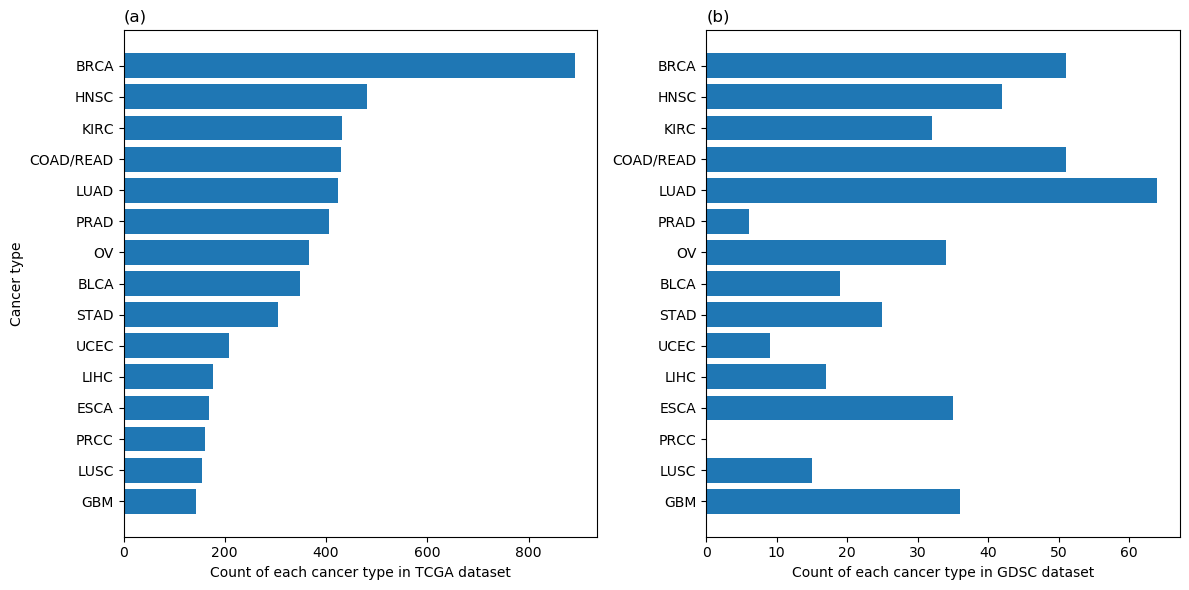

In [91]:
# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6), tight_layout=True)

# Example data
y_l = list(tcga_plt_df.index)
y_pos = np.arange(len(y_l))
x_value = tcga_plt_df["X_AB"]

# Plot
ax1.barh(y_pos, x_value, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(y_l)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel("Count of each cancer type in TCGA dataset")
ax1.set_ylabel("Cancer type")
ax1.set_title("(a)", loc="left")

# Example data
y_l = list(tcga_plt_df.index)
y_pos = np.arange(len(y_l))
x_value = gdsc_plt_df.loc[tcga_plt_df.index]["TCGA Label"]

# Plot
ax2.barh(y_pos, x_value, align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(y_l)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel("Count of each cancer type in GDSC dataset")
ax2.set_title("(b)", loc="left")


plt.show()